In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('https://drive.usercontent.google.com/download?id=1tA4lT8i-_AkakzGcEjbeLTQ9Dmkfz6Pp&export=download&authuser=0&confirm=t&uuid=bad59fd3-2151-4782-8b35-cd7e3d7feca7&at=APZUnTVK0PV83UjeSlNlBCNJI1d4:1707538933435')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [4]:
#Basic Data Exploration
import pandas as pd

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

# Determine the data types of each column
print(df.dtypes)

# Check for missing values in each column
print(df.isnull().sum())


Number of rows: 148654
Number of columns: 13
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [9]:
#Descriptive Statistics

# Assuming df is your DataFrame
print(df['TotalPay'].describe())

salary_range = df['TotalPay'].max() - df['TotalPay'].min()
print(f'Salary range: {salary_range}')


count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64
Salary range: 568213.56


In [10]:
# Data Cleaning
# Fill missing numerical values with the median of their respective columns
for column in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']:
    df[column].fillna(df[column].median(), inplace=True)

# Drop the 'Notes' and 'Status' columns as they are entirely missing or irrelevant
df.drop(['Notes', 'Status'], axis=1, inplace=True)

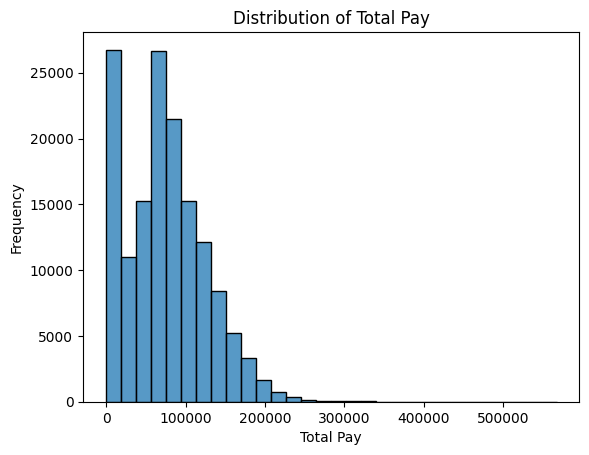

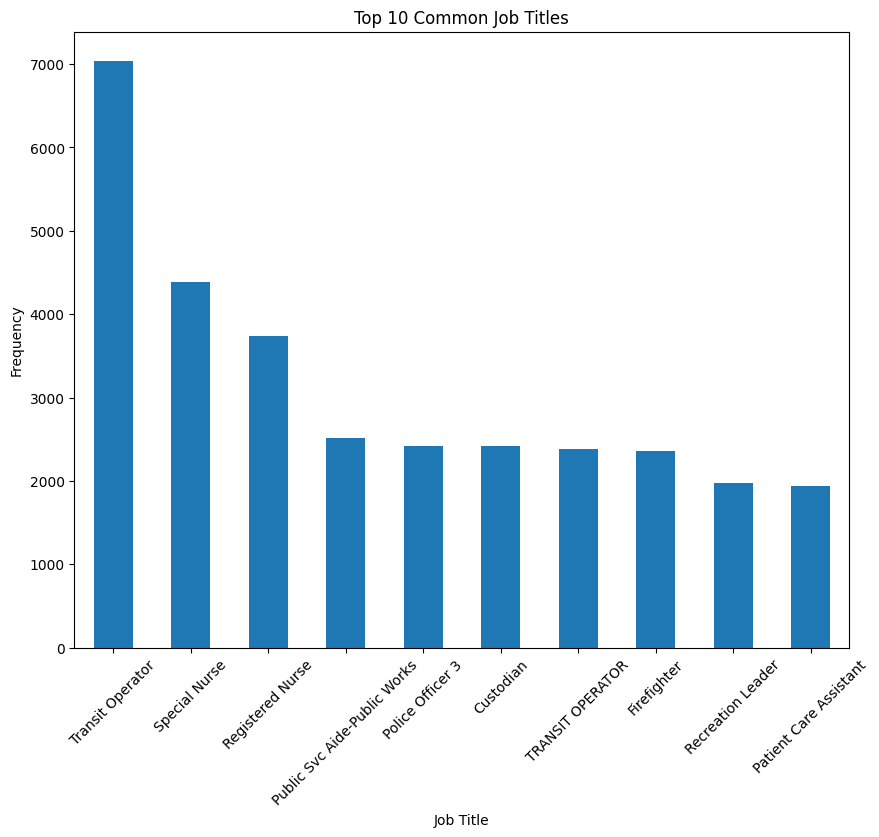

In [13]:
#Basic Viz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of TotalPay
sns.histplot(df['TotalPay'], bins=30)
plt.title('Distribution of Total Pay')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

# Since the 'Department' column isn't available, we'll visualize top 10 common JobTitles
top_job_titles = df['JobTitle'].value_counts().head(10)
plt.figure(figsize=(10, 8))
top_job_titles.plot(kind='bar')
plt.title('Top 10 Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [14]:
#Grouped Analysis
# Summary statistics by Year
grouped_year = df.groupby('Year')['TotalPay'].agg(['mean', 'median', 'std'])
print(grouped_year)


              mean     median           std
Year                                       
2011  71744.103871  68213.240  47498.706594
2012  74113.262265  70714.680  49523.904319
2013  77611.443142  74500.015  52854.774783
2014  75463.918140  72359.980  51697.713029


          TotalPay  Benefits
TotalPay  1.000000  0.773559
Benefits  0.773559  1.000000


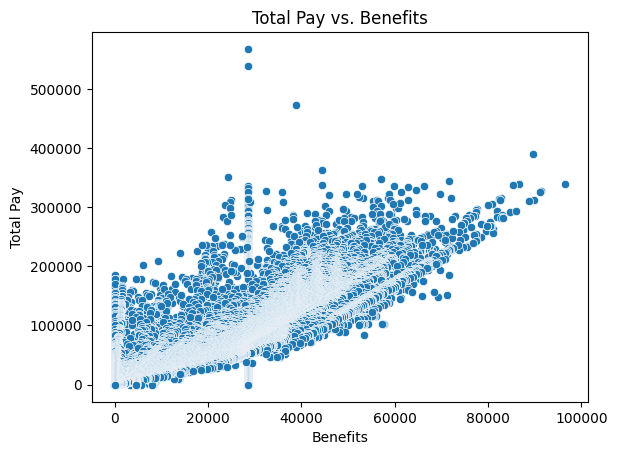

In [15]:
#Simple Correlation Analysis

print(df[['TotalPay', 'Benefits']].corr())

# Scatter plot for visualization
sns.scatterplot(data=df, x='Benefits', y='TotalPay')
plt.title('Total Pay vs. Benefits')
plt.xlabel('Benefits')
plt.ylabel('Total Pay')
plt.show()
